## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 68.4ms	remaining: 1m 8s
1:	learn: 0.9606716	total: 69.5ms	remaining: 34.7s
2:	learn: 0.9390920	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9209237	total: 71.8ms	remaining: 17.9s
4:	learn: 0.9046978	total: 72.7ms	remaining: 14.5s
5:	learn: 0.8896854	total: 73.6ms	remaining: 12.2s
6:	learn: 0.8724151	total: 74.5ms	remaining: 10.6s
7:	learn: 0.8558633	total: 75.4ms	remaining: 9.35s
8:	learn: 0.8400199	total: 76.4ms	remaining: 8.41s
9:	learn: 0.8229065	total: 77.4ms	remaining: 7.66s
10:	learn: 0.8057776	total: 78.3ms	remaining: 7.04s
11:	learn: 0.7907426	total: 79.3ms	remaining: 6.52s
12:	learn: 0.7753485	total: 80.3ms	remaining: 6.09s
13:	learn: 0.7601130	total: 81.2ms	remaining: 5.71s
14:	learn: 0.7475256	total: 82ms	remaining: 5.39s
15:	learn: 0.7326054	total: 82.9ms	remaining: 5.1s
16:	learn: 0.7206853	total: 83.9ms	remaining: 4.85s
17:	learn: 0.7077303	total: 84.8ms	remaining: 4.63s
18:	learn: 0.6955287	total: 85.7ms	remaining: 4

96:	learn: 0.3128617	total: 151ms	remaining: 1.4s
97:	learn: 0.3114186	total: 152ms	remaining: 1.39s
98:	learn: 0.3101878	total: 152ms	remaining: 1.39s
99:	learn: 0.3091652	total: 153ms	remaining: 1.38s
100:	learn: 0.3073446	total: 154ms	remaining: 1.37s
101:	learn: 0.3059717	total: 155ms	remaining: 1.36s
102:	learn: 0.3044976	total: 156ms	remaining: 1.36s
103:	learn: 0.3030824	total: 157ms	remaining: 1.35s
104:	learn: 0.3013455	total: 158ms	remaining: 1.34s
105:	learn: 0.2996238	total: 159ms	remaining: 1.34s
106:	learn: 0.2980370	total: 160ms	remaining: 1.34s
107:	learn: 0.2965967	total: 161ms	remaining: 1.33s
108:	learn: 0.2951864	total: 162ms	remaining: 1.32s
109:	learn: 0.2942861	total: 163ms	remaining: 1.32s
110:	learn: 0.2932928	total: 164ms	remaining: 1.31s
111:	learn: 0.2916150	total: 164ms	remaining: 1.3s
112:	learn: 0.2903158	total: 165ms	remaining: 1.3s
113:	learn: 0.2893044	total: 166ms	remaining: 1.29s
114:	learn: 0.2880453	total: 167ms	remaining: 1.28s
115:	learn: 0.28689

144:	learn: 0.2583398	total: 192ms	remaining: 1.13s
145:	learn: 0.2574131	total: 193ms	remaining: 1.13s
146:	learn: 0.2561256	total: 194ms	remaining: 1.13s
147:	learn: 0.2550767	total: 195ms	remaining: 1.12s
148:	learn: 0.2541599	total: 196ms	remaining: 1.12s
149:	learn: 0.2534840	total: 197ms	remaining: 1.11s
150:	learn: 0.2527124	total: 198ms	remaining: 1.11s
151:	learn: 0.2520669	total: 199ms	remaining: 1.11s
152:	learn: 0.2511829	total: 200ms	remaining: 1.1s
153:	learn: 0.2507161	total: 200ms	remaining: 1.1s
154:	learn: 0.2497802	total: 201ms	remaining: 1.1s
155:	learn: 0.2490613	total: 202ms	remaining: 1.09s
156:	learn: 0.2484356	total: 203ms	remaining: 1.09s
157:	learn: 0.2475208	total: 203ms	remaining: 1.08s
158:	learn: 0.2467460	total: 204ms	remaining: 1.08s
159:	learn: 0.2461317	total: 205ms	remaining: 1.08s
160:	learn: 0.2456028	total: 206ms	remaining: 1.07s
161:	learn: 0.2449256	total: 207ms	remaining: 1.07s
162:	learn: 0.2444113	total: 208ms	remaining: 1.07s
163:	learn: 0.2

317:	learn: 0.1714053	total: 341ms	remaining: 731ms
318:	learn: 0.1709797	total: 342ms	remaining: 729ms
319:	learn: 0.1706233	total: 343ms	remaining: 728ms
320:	learn: 0.1703284	total: 343ms	remaining: 726ms
321:	learn: 0.1700544	total: 344ms	remaining: 725ms
322:	learn: 0.1696955	total: 345ms	remaining: 723ms
323:	learn: 0.1695203	total: 346ms	remaining: 722ms
324:	learn: 0.1693707	total: 347ms	remaining: 720ms
325:	learn: 0.1690932	total: 347ms	remaining: 718ms
326:	learn: 0.1687871	total: 348ms	remaining: 717ms
327:	learn: 0.1684932	total: 349ms	remaining: 715ms
328:	learn: 0.1680740	total: 350ms	remaining: 713ms
329:	learn: 0.1676495	total: 351ms	remaining: 712ms
330:	learn: 0.1672606	total: 351ms	remaining: 710ms
331:	learn: 0.1669891	total: 352ms	remaining: 709ms
332:	learn: 0.1666284	total: 353ms	remaining: 707ms
333:	learn: 0.1664670	total: 354ms	remaining: 706ms
334:	learn: 0.1660441	total: 355ms	remaining: 705ms
335:	learn: 0.1657088	total: 356ms	remaining: 703ms
336:	learn: 

366:	learn: 0.1574980	total: 382ms	remaining: 659ms
367:	learn: 0.1573862	total: 383ms	remaining: 658ms
368:	learn: 0.1572274	total: 384ms	remaining: 657ms
369:	learn: 0.1568606	total: 385ms	remaining: 656ms
370:	learn: 0.1564609	total: 386ms	remaining: 654ms
371:	learn: 0.1560608	total: 387ms	remaining: 653ms
372:	learn: 0.1558547	total: 387ms	remaining: 651ms
373:	learn: 0.1555605	total: 388ms	remaining: 650ms
374:	learn: 0.1552292	total: 389ms	remaining: 649ms
375:	learn: 0.1549435	total: 390ms	remaining: 647ms
376:	learn: 0.1546544	total: 391ms	remaining: 646ms
377:	learn: 0.1543066	total: 392ms	remaining: 644ms
378:	learn: 0.1540311	total: 392ms	remaining: 643ms
379:	learn: 0.1536233	total: 393ms	remaining: 642ms
380:	learn: 0.1533239	total: 394ms	remaining: 641ms
381:	learn: 0.1530299	total: 395ms	remaining: 639ms
382:	learn: 0.1528336	total: 396ms	remaining: 638ms
383:	learn: 0.1526162	total: 397ms	remaining: 637ms
384:	learn: 0.1523426	total: 398ms	remaining: 635ms
385:	learn: 

542:	learn: 0.1212860	total: 531ms	remaining: 447ms
543:	learn: 0.1211131	total: 532ms	remaining: 446ms
544:	learn: 0.1208536	total: 533ms	remaining: 445ms
545:	learn: 0.1207734	total: 534ms	remaining: 444ms
546:	learn: 0.1205887	total: 535ms	remaining: 443ms
547:	learn: 0.1203470	total: 536ms	remaining: 442ms
548:	learn: 0.1201638	total: 536ms	remaining: 441ms
549:	learn: 0.1200067	total: 537ms	remaining: 440ms
550:	learn: 0.1198272	total: 538ms	remaining: 439ms
551:	learn: 0.1195666	total: 539ms	remaining: 438ms
552:	learn: 0.1194183	total: 540ms	remaining: 437ms
553:	learn: 0.1191881	total: 541ms	remaining: 436ms
554:	learn: 0.1189026	total: 542ms	remaining: 434ms
555:	learn: 0.1187021	total: 543ms	remaining: 433ms
556:	learn: 0.1185118	total: 544ms	remaining: 432ms
557:	learn: 0.1183468	total: 545ms	remaining: 431ms
558:	learn: 0.1181768	total: 545ms	remaining: 430ms
559:	learn: 0.1179853	total: 546ms	remaining: 429ms
560:	learn: 0.1177859	total: 547ms	remaining: 428ms
561:	learn: 

588:	learn: 0.1134371	total: 573ms	remaining: 400ms
589:	learn: 0.1131994	total: 574ms	remaining: 399ms
590:	learn: 0.1130597	total: 575ms	remaining: 398ms
591:	learn: 0.1128132	total: 576ms	remaining: 397ms
592:	learn: 0.1126699	total: 576ms	remaining: 396ms
593:	learn: 0.1125247	total: 577ms	remaining: 395ms
594:	learn: 0.1123135	total: 578ms	remaining: 394ms
595:	learn: 0.1120719	total: 579ms	remaining: 393ms
596:	learn: 0.1118641	total: 580ms	remaining: 392ms
597:	learn: 0.1116640	total: 581ms	remaining: 390ms
598:	learn: 0.1114721	total: 582ms	remaining: 389ms
599:	learn: 0.1113192	total: 583ms	remaining: 388ms
600:	learn: 0.1111923	total: 584ms	remaining: 387ms
601:	learn: 0.1109718	total: 584ms	remaining: 386ms
602:	learn: 0.1108705	total: 585ms	remaining: 385ms
603:	learn: 0.1106417	total: 586ms	remaining: 384ms
604:	learn: 0.1104217	total: 587ms	remaining: 383ms
605:	learn: 0.1103460	total: 587ms	remaining: 382ms
606:	learn: 0.1101823	total: 588ms	remaining: 381ms
607:	learn: 

763:	learn: 0.0899894	total: 721ms	remaining: 223ms
764:	learn: 0.0898732	total: 722ms	remaining: 222ms
765:	learn: 0.0897384	total: 722ms	remaining: 221ms
766:	learn: 0.0896966	total: 723ms	remaining: 220ms
767:	learn: 0.0895544	total: 724ms	remaining: 219ms
768:	learn: 0.0893441	total: 725ms	remaining: 218ms
769:	learn: 0.0891873	total: 725ms	remaining: 217ms
770:	learn: 0.0890086	total: 726ms	remaining: 216ms
771:	learn: 0.0888501	total: 727ms	remaining: 215ms
772:	learn: 0.0886622	total: 728ms	remaining: 214ms
773:	learn: 0.0885537	total: 729ms	remaining: 213ms
774:	learn: 0.0884440	total: 730ms	remaining: 212ms
775:	learn: 0.0883600	total: 731ms	remaining: 211ms
776:	learn: 0.0882487	total: 731ms	remaining: 210ms
777:	learn: 0.0881022	total: 732ms	remaining: 209ms
778:	learn: 0.0879793	total: 733ms	remaining: 208ms
779:	learn: 0.0879265	total: 734ms	remaining: 207ms
780:	learn: 0.0877857	total: 735ms	remaining: 206ms
781:	learn: 0.0877384	total: 736ms	remaining: 205ms
782:	learn: 

813:	learn: 0.0844637	total: 763ms	remaining: 174ms
814:	learn: 0.0842755	total: 764ms	remaining: 174ms
815:	learn: 0.0841571	total: 765ms	remaining: 173ms
816:	learn: 0.0840457	total: 766ms	remaining: 172ms
817:	learn: 0.0839504	total: 767ms	remaining: 171ms
818:	learn: 0.0838712	total: 768ms	remaining: 170ms
819:	learn: 0.0838468	total: 769ms	remaining: 169ms
820:	learn: 0.0836924	total: 769ms	remaining: 168ms
821:	learn: 0.0835513	total: 770ms	remaining: 167ms
822:	learn: 0.0834487	total: 771ms	remaining: 166ms
823:	learn: 0.0833678	total: 772ms	remaining: 165ms
824:	learn: 0.0833064	total: 773ms	remaining: 164ms
825:	learn: 0.0831463	total: 774ms	remaining: 163ms
826:	learn: 0.0830545	total: 775ms	remaining: 162ms
827:	learn: 0.0829920	total: 776ms	remaining: 161ms
828:	learn: 0.0829252	total: 776ms	remaining: 160ms
829:	learn: 0.0827970	total: 777ms	remaining: 159ms
830:	learn: 0.0826774	total: 778ms	remaining: 158ms
831:	learn: 0.0826484	total: 779ms	remaining: 157ms
832:	learn: 

985:	learn: 0.0696729	total: 911ms	remaining: 12.9ms
986:	learn: 0.0695978	total: 912ms	remaining: 12ms
987:	learn: 0.0695103	total: 913ms	remaining: 11.1ms
988:	learn: 0.0694633	total: 914ms	remaining: 10.2ms
989:	learn: 0.0693641	total: 915ms	remaining: 9.24ms
990:	learn: 0.0693544	total: 915ms	remaining: 8.31ms
991:	learn: 0.0692877	total: 916ms	remaining: 7.39ms
992:	learn: 0.0691795	total: 917ms	remaining: 6.46ms
993:	learn: 0.0690561	total: 918ms	remaining: 5.54ms
994:	learn: 0.0689593	total: 919ms	remaining: 4.62ms
995:	learn: 0.0688740	total: 920ms	remaining: 3.69ms
996:	learn: 0.0688345	total: 921ms	remaining: 2.77ms
997:	learn: 0.0688269	total: 921ms	remaining: 1.85ms
998:	learn: 0.0687463	total: 922ms	remaining: 923us
999:	learn: 0.0687026	total: 923ms	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1252676695662873


#### Sanity Checks 

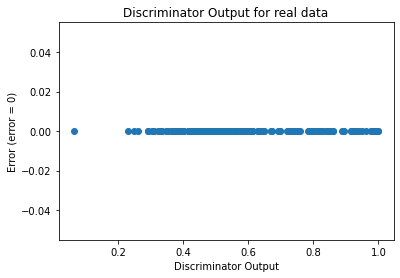

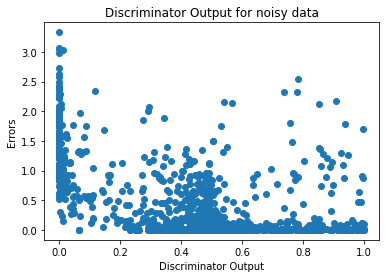

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 3439


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.11814387935419345


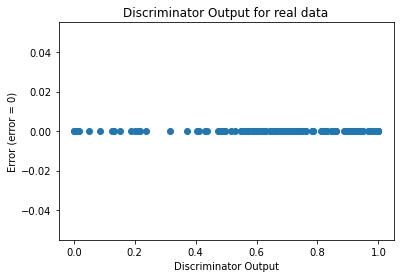

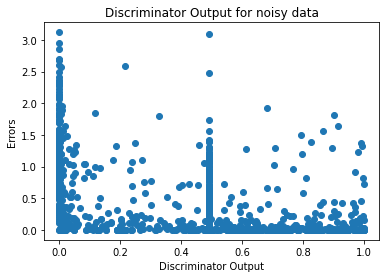

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.49079518946811085


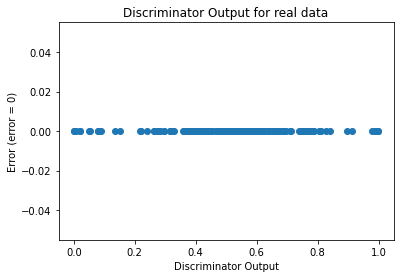

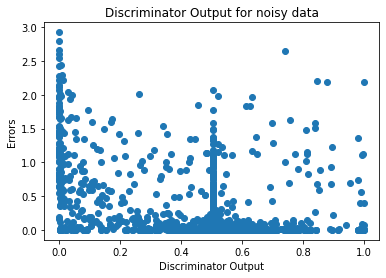

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9739]], requires_grad=True)
